# Разработка рекомендательной модели тарифов сотовой связи

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Компания хочет построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. 

<font color='green'>Цель</font>

Нужно построить модель, которая выберет подходящий клиенту тариф. Основная метрика эффективности - `accuracy`.

<font color='green'>Задачи</font>

- изучить данные;
- разделить исходные данные на обучающую, валидационную и тестовую выборки;
- исследовать качество следующих моделей:
  
      1) Решающее дерево
      2) Cлучайный лес
      3) Логистическая регрессия
  
- проверить качество модели на тестовой выборке;
- проверить модель на вменяемость.

<font color='green'>Файлы</font>


- `users_behavior.csv`

<font color='green'>Столбцы</font>


- `сalls` — количество звонков,
- `minutes` — суммарная длительность звонков в минутах,
- `messages` — количество sms-сообщений,
- `mb_used` — израсходованный интернет-трафик в Мб,
- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<font color='green'>Содержание</font>

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Изучение-данных-из-файла" data-toc-modified-id="Шаг-1.-Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Изучение данных из файла</a></span></li><li><span><a href="#Шаг-2.-Разделение-данных-на-выборки" data-toc-modified-id="Шаг-2.-Разделение-данных-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Разделение данных на выборки</a></span></li><li><span><a href="#Шаг-3.-Исследование-моделей" data-toc-modified-id="Шаг-3.-Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cлучайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Шаг-4.-Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Шаг-4.-Проверка-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Шаг-5.-Проверка-моделей-на-адекватность" data-toc-modified-id="Шаг-5.-Проверка-моделей-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Проверка моделей на адекватность</a></span></li></ul></div>

## Шаг 1. Изучение данных из файла

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, f1_score
from sklearn.dummy import DummyClassifier

import IPython

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/ML/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропущенных значений нет.

In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Посмотрим на распределения.

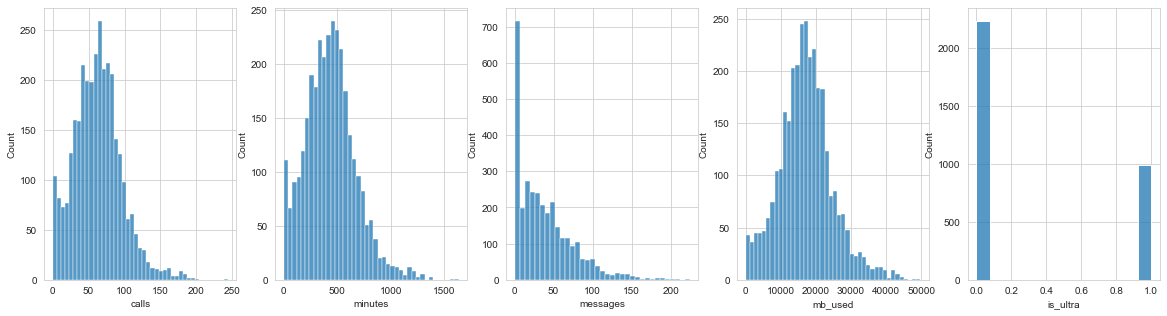

In [6]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 5, figsize=(20,5))
c = 0
for column in df.columns:
    sns.histplot(data = df, x = column, ax=axes[c]) 
    c += 1

In [7]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Посмотрим на корреляции.

<Figure size 432x288 with 0 Axes>

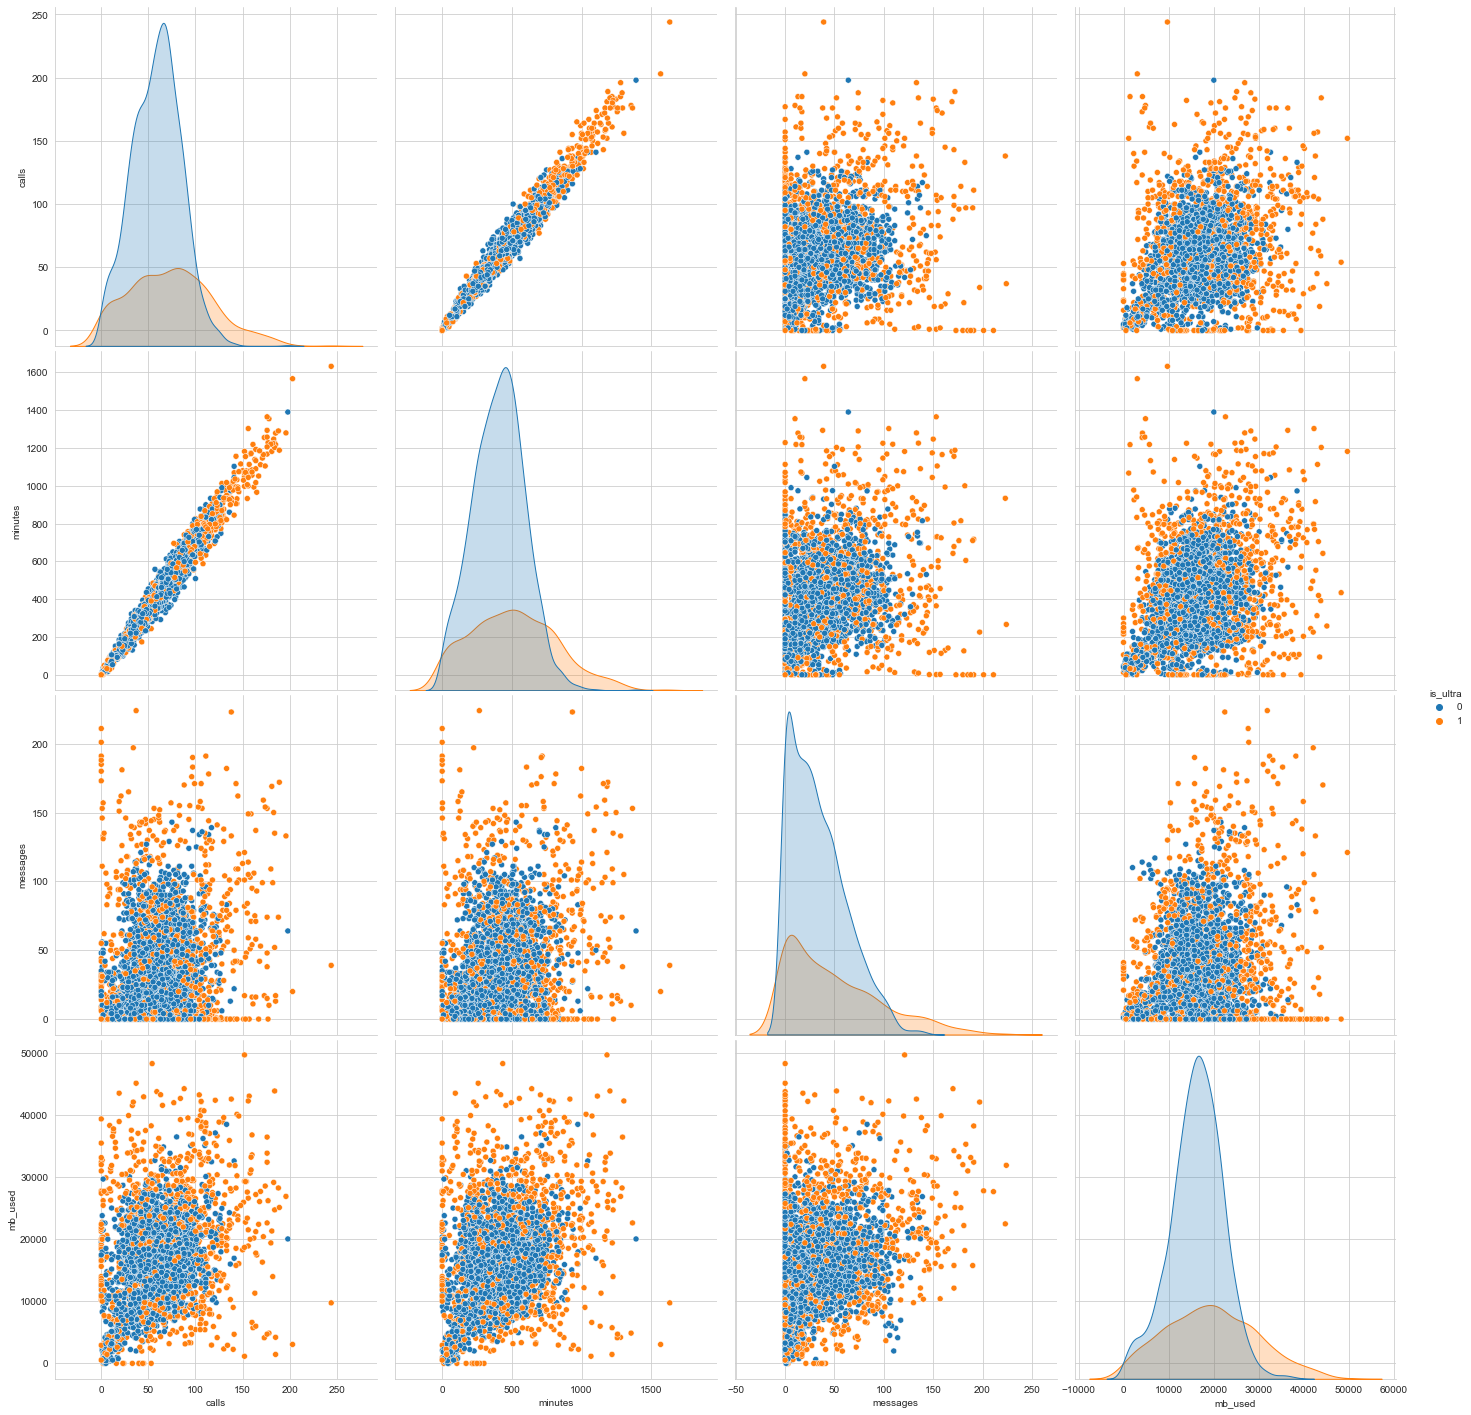

In [8]:
plt.figure()
sns.pairplot(df, hue = "is_ultra", height=5)

**Вывод**

Выборка линейно неразделимая. Категории не сбалансированы: категория "0" - 2229 пользователей (69.35%), категория "1" - 985 пользователей (30.65%).   

## Шаг 2. Разделение данных на выборки

Выделим признаки и целевой признак. 

In [9]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

Разобьём данные на тренировочную, валидационную и тестовую выборки.

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

Проверим размеры полученных файлов. 

In [11]:
print(features_train.shape, target_train.shape, features_valid.shape, target_valid.shape, features_test.shape,\
    target_test.shape)

(1928, 4) (1928,) (643, 4) (643,) (643, 4) (643,)


Проверим распределение целевого признака в сформированных выборках. 

In [12]:
print("целевой признак в тренировочной выборке:", '{:.2%}'.format(target_train.sum()/target_train.count()))
print("целевой признак в валидационной выборке:", '{:.2%}'.format(target_valid.sum()/target_valid.count()))
print("целевой признак в тестовой выборке:", '{:.2%}'.format(target_test.sum()/target_test.count()))

целевой признак в тренировочной выборке: 30.65%
целевой признак в валидационной выборке: 30.64%
целевой признак в тестовой выборке: 30.64%


**Вывод**

В качестве признаков для будущей модели используются все имеющиеся в нашем распоряжении данные. 

Размер сформированных выборок:
- обучающая - 60%
- валидационная - 20%
- тестовая - 20%.

## Шаг 3. Исследование моделей

### Решающее дерево

In [13]:
best_model = None
best_accuracy_result = 0

In [14]:
%%time
best_model_decision_tree = None
best_result_decision_tree = 0

for depth in range(1, 10):
    model_decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_decision_tree.fit(features_train, target_train) 
    predictions_valid = model_decision_tree.predict(features_valid) 
    result = accuracy_score(target_valid, predictions_valid)
    
    if result > best_result_decision_tree:
            best_result_decision_tree = result
            best_model_decision_tree = model_decision_tree
    
if best_result_decision_tree > best_accuracy_result:
        best_model = best_model_decision_tree
        best_accuracy_result = best_result_decision_tree       
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result_decision_tree)                            

Accuracy наилучшей модели на валидационной выборке: 0.8118195956454122
CPU times: total: 62.5 ms
Wall time: 54 ms


### Cлучайный лес

In [15]:
%%time
best_model_random_forest = None
best_result_random_forest = 0

for est in range(1, 65):
    for depth in range(1, 10):
        model_random_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_random_forest.fit(features_train, target_train)
        predictions_valid = model_random_forest.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)
        
        if result > best_result_random_forest:
            best_result_random_forest = result
            best_model_random_forest = model_random_forest
    
if best_result_random_forest > best_accuracy_result:
        best_model = best_model_random_forest
        best_accuracy_result = best_result_random_forest       
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result_random_forest)           

Accuracy наилучшей модели на валидационной выборке: 0.8242612752721618
CPU times: total: 42.9 s
Wall time: 43.1 s


### Логистическая регрессия

In [16]:
%%time
result = 0

model_logistic_regression = LogisticRegression(random_state=12345, solver='lbfgs') 
model_logistic_regression.fit(features_train, target_train)
predictions_valid = model_logistic_regression.predict(features_valid)
result = accuracy_score(target_valid, predictions_valid)

if result > best_accuracy_result:
        best_model = model_logistic_regression
        best_accuracy_result = result       

print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.7465007776049767
CPU times: total: 15.6 ms
Wall time: 19 ms


**Вывод**

In [17]:
time_result = pd.DataFrame([['Логистическая регрессия', '0.7465'],
                  ['Решающее дерево', '0.8118'],
                  ['Cлучайный лес', '0.8243']], columns=['Модель', 'Accuracy'])
time_result

,Модель,Accuracy
0,Логистическая регрессия,0.7465
1,Решающее дерево,0.8118
2,Cлучайный лес,0.8243


Чем больше параметр `Accuracy`, тем больше итоговое время работы в нашем случае. Т.к. в работе не стоит ограничение по времени, для дальнейшей работы выбрана модель `"Случайный лес"`. 

## Шаг 4. Проверка модели на тестовой выборке

Проверим выбранную нами модель.

In [18]:
best_model

RandomForestClassifier(max_depth=5, n_estimators=63, random_state=12345)

In [19]:
predictions_train = best_model.predict(features_train)
result = accuracy_score(target_train, predictions_train)
print("Accuracy модели на валидационной выборке:", result)

predictions_valid = best_model.predict(features_valid) 
result = accuracy_score(target_valid, predictions_valid)
print("Accuracy модели на валидационной выборке:", result)

predictions_test = best_model.predict(features_test) 
result = accuracy_score(target_test, predictions_test)
print("Accuracy модели на тестовой выборке:", result)

Accuracy модели на валидационной выборке: 0.821058091286307
Accuracy модели на валидационной выборке: 0.8242612752721618
Accuracy модели на тестовой выборке: 0.80248833592535


Значение `Accuracy` на тестовой выборке приемлемо. Построим матрицу ошибок для нашей модели.

In [20]:
matrix = confusion_matrix(target_test,predictions_test, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 92 105]
 [ 22 424]]


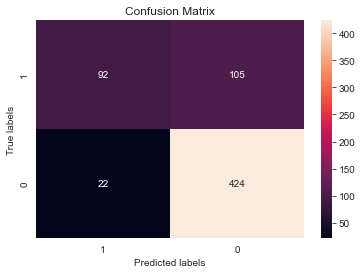

In [21]:
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

Наша модель достаточно плохо предсказывает категорию `"1"`.

**Вывод**

Значение Accuracy на тестовой выборке для выбранной модели - 0.80248833592535, что выше порогового значения `0,75`. 

Предсказания модели:

    Категория "1" - 92 верных ответа и 105 неверных.
    Категории "0" - 424 верных ответа и 22 неверных.

## Шаг 5. Проверка моделей на адекватность

Сравним нашу модель с двумя следующими:

    Модель 1: присваивает категорию случайно.
    Модель 2: присваивает всем объектам категорию "0".
    
Классы в задаче распределены неравномерно: в тестовой выборке 643 элемента, из них 197 относятся к категории `"1"` и 446 к `"0"`.

    Модель 1: 
    Accuracy равно: 0.5000 (0.306 * 0.5 + 0,694 * 0.5) 

    Модель 2: 
    Accuracy равно: 0.6936 (446/643) 

    Наша модель:
    Accuracy равно: 0.8025 
 
`Модель 2` имеет достаточно высокий показатель `Accuracy`, несмотря на ее неадекватность. Это говорит в пользу того, что в данных с неравномерно распределенными классами стоит использовать и другие метрики, например `precision` и `recall`. 

In [22]:
precision = precision_score(target_test, predictions_test)
recall = recall_score(target_test, predictions_test)
print("Наша модель\nPrecision(Точность): {:.3f}\nRecall(Полнота):     {:.3f}\nМодель 2\nPrecision(Точность): 0.000\
      \nRecall(Полнота):     0.000".format(precision, recall))

Наша модель
Precision(Точность): 0.807
Recall(Полнота):     0.467
Модель 2
Precision(Точность): 0.000      
Recall(Полнота):     0.000


В данном случае метрики `precision` и `recall` дают более полное представление об адекватности моделей. 

In [23]:
baseline_model = DummyClassifier(strategy="most_frequent", random_state=0)
baseline_model.fit(features_train, target_train)
predictions_valid = baseline_model.predict(features_valid)
result = accuracy_score(target_valid, predictions_valid)
print("Accuracy baseline модели на тестовой выборке:", result)

Accuracy baseline модели на тестовой выборке: 0.6936236391912908


**Вывод**

Рабочей моделью для выбора подходящего клиенту тарифа признана модель `"Cлучайный лес"` со следующими параметрами:

In [24]:
best_model

RandomForestClassifier(max_depth=5, n_estimators=63, random_state=12345)

`Accuracy` модели:

- на валидационной выборке:   0.8242612752721618
- на тестовой выборке:        0.80248833592535

Модель признана приемлемой.

Из-за несбалансированности классов введены дополнительные метрики: `precision` и `recall`. Их покаказатели для тестовой выборки:

    Precision:  0.807
    Recall:     0.467        